# Testing belief

In [757]:
from models.single_policy import SinglePolicy
from single_agent import SingleAgent
from IPython.display import SVG, display, HTML
import torch
from torch import distributions
from vh_graph.envs import belief
import pdb
import vh_graph
import gym
import envdataset
import utils_viz
import utils
import sys
from IPython.display import Image
sys.argv = ['-f'] 

In [758]:
curr_env = gym.make('vh_graph-v0')

In [759]:
path_init_env = 'dataset_toy3/init_envs/TrimmedTestScene6_graph_42.json'
goal_name = {0:'(facing living_room[1] living_room[1])'}
curr_env.reset(path_init_env, goal_name)
curr_env.to_pomdp()
gt_state = curr_env.vh_state.to_dict()


In [760]:
[x for x in gt_state['edges'] if x['relation_type'] == 'BETWEEN']

[{'from_id': 1099, 'relation_type': 'BETWEEN', 'to_id': 163},
 {'from_id': 1099, 'relation_type': 'BETWEEN', 'to_id': 246}]

In [761]:
id_agent = [x['id'] for x in gt_state['nodes'] if x['class_name'] == 'character'][0]
id_goal = 2026
goal_str = 'findnode_{}'.format(id_goal)


### Visualize GT graph

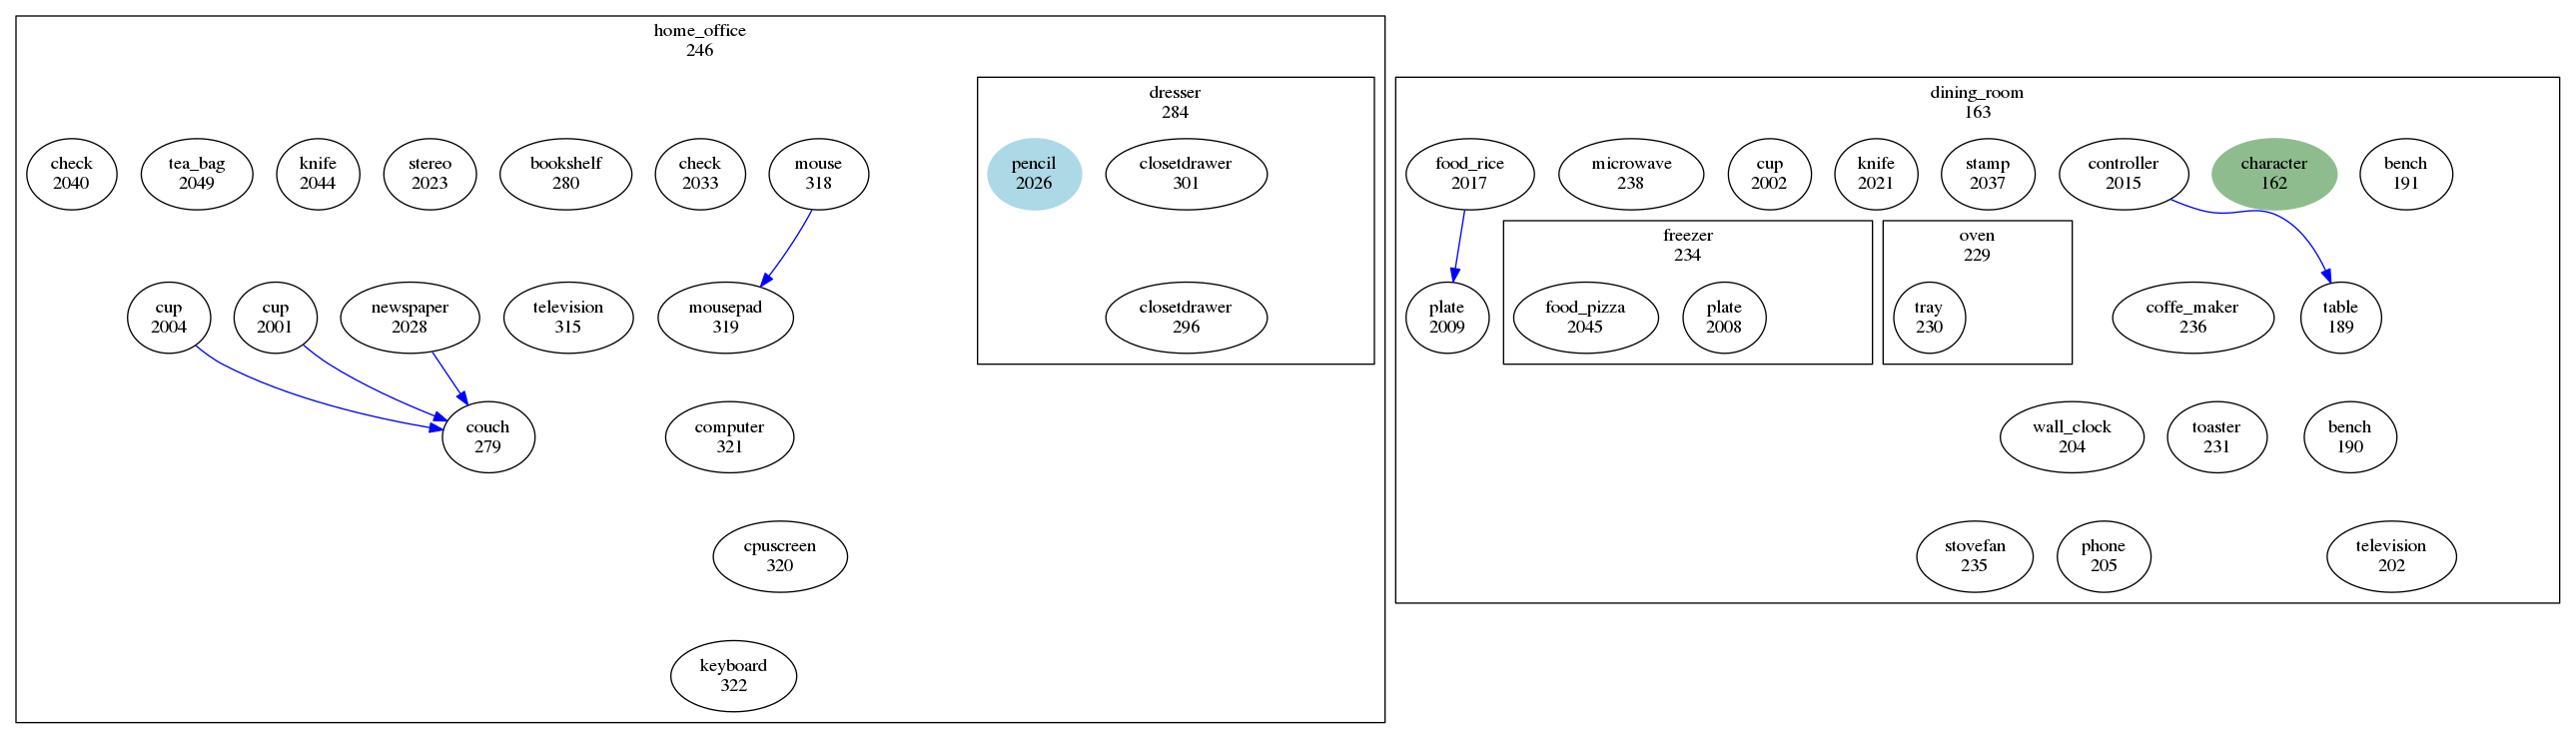

In [762]:
graph = utils_viz.graph2im(gt_state, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

### Visualize Belief

HERE
HERE
{1099: [163, 246]}


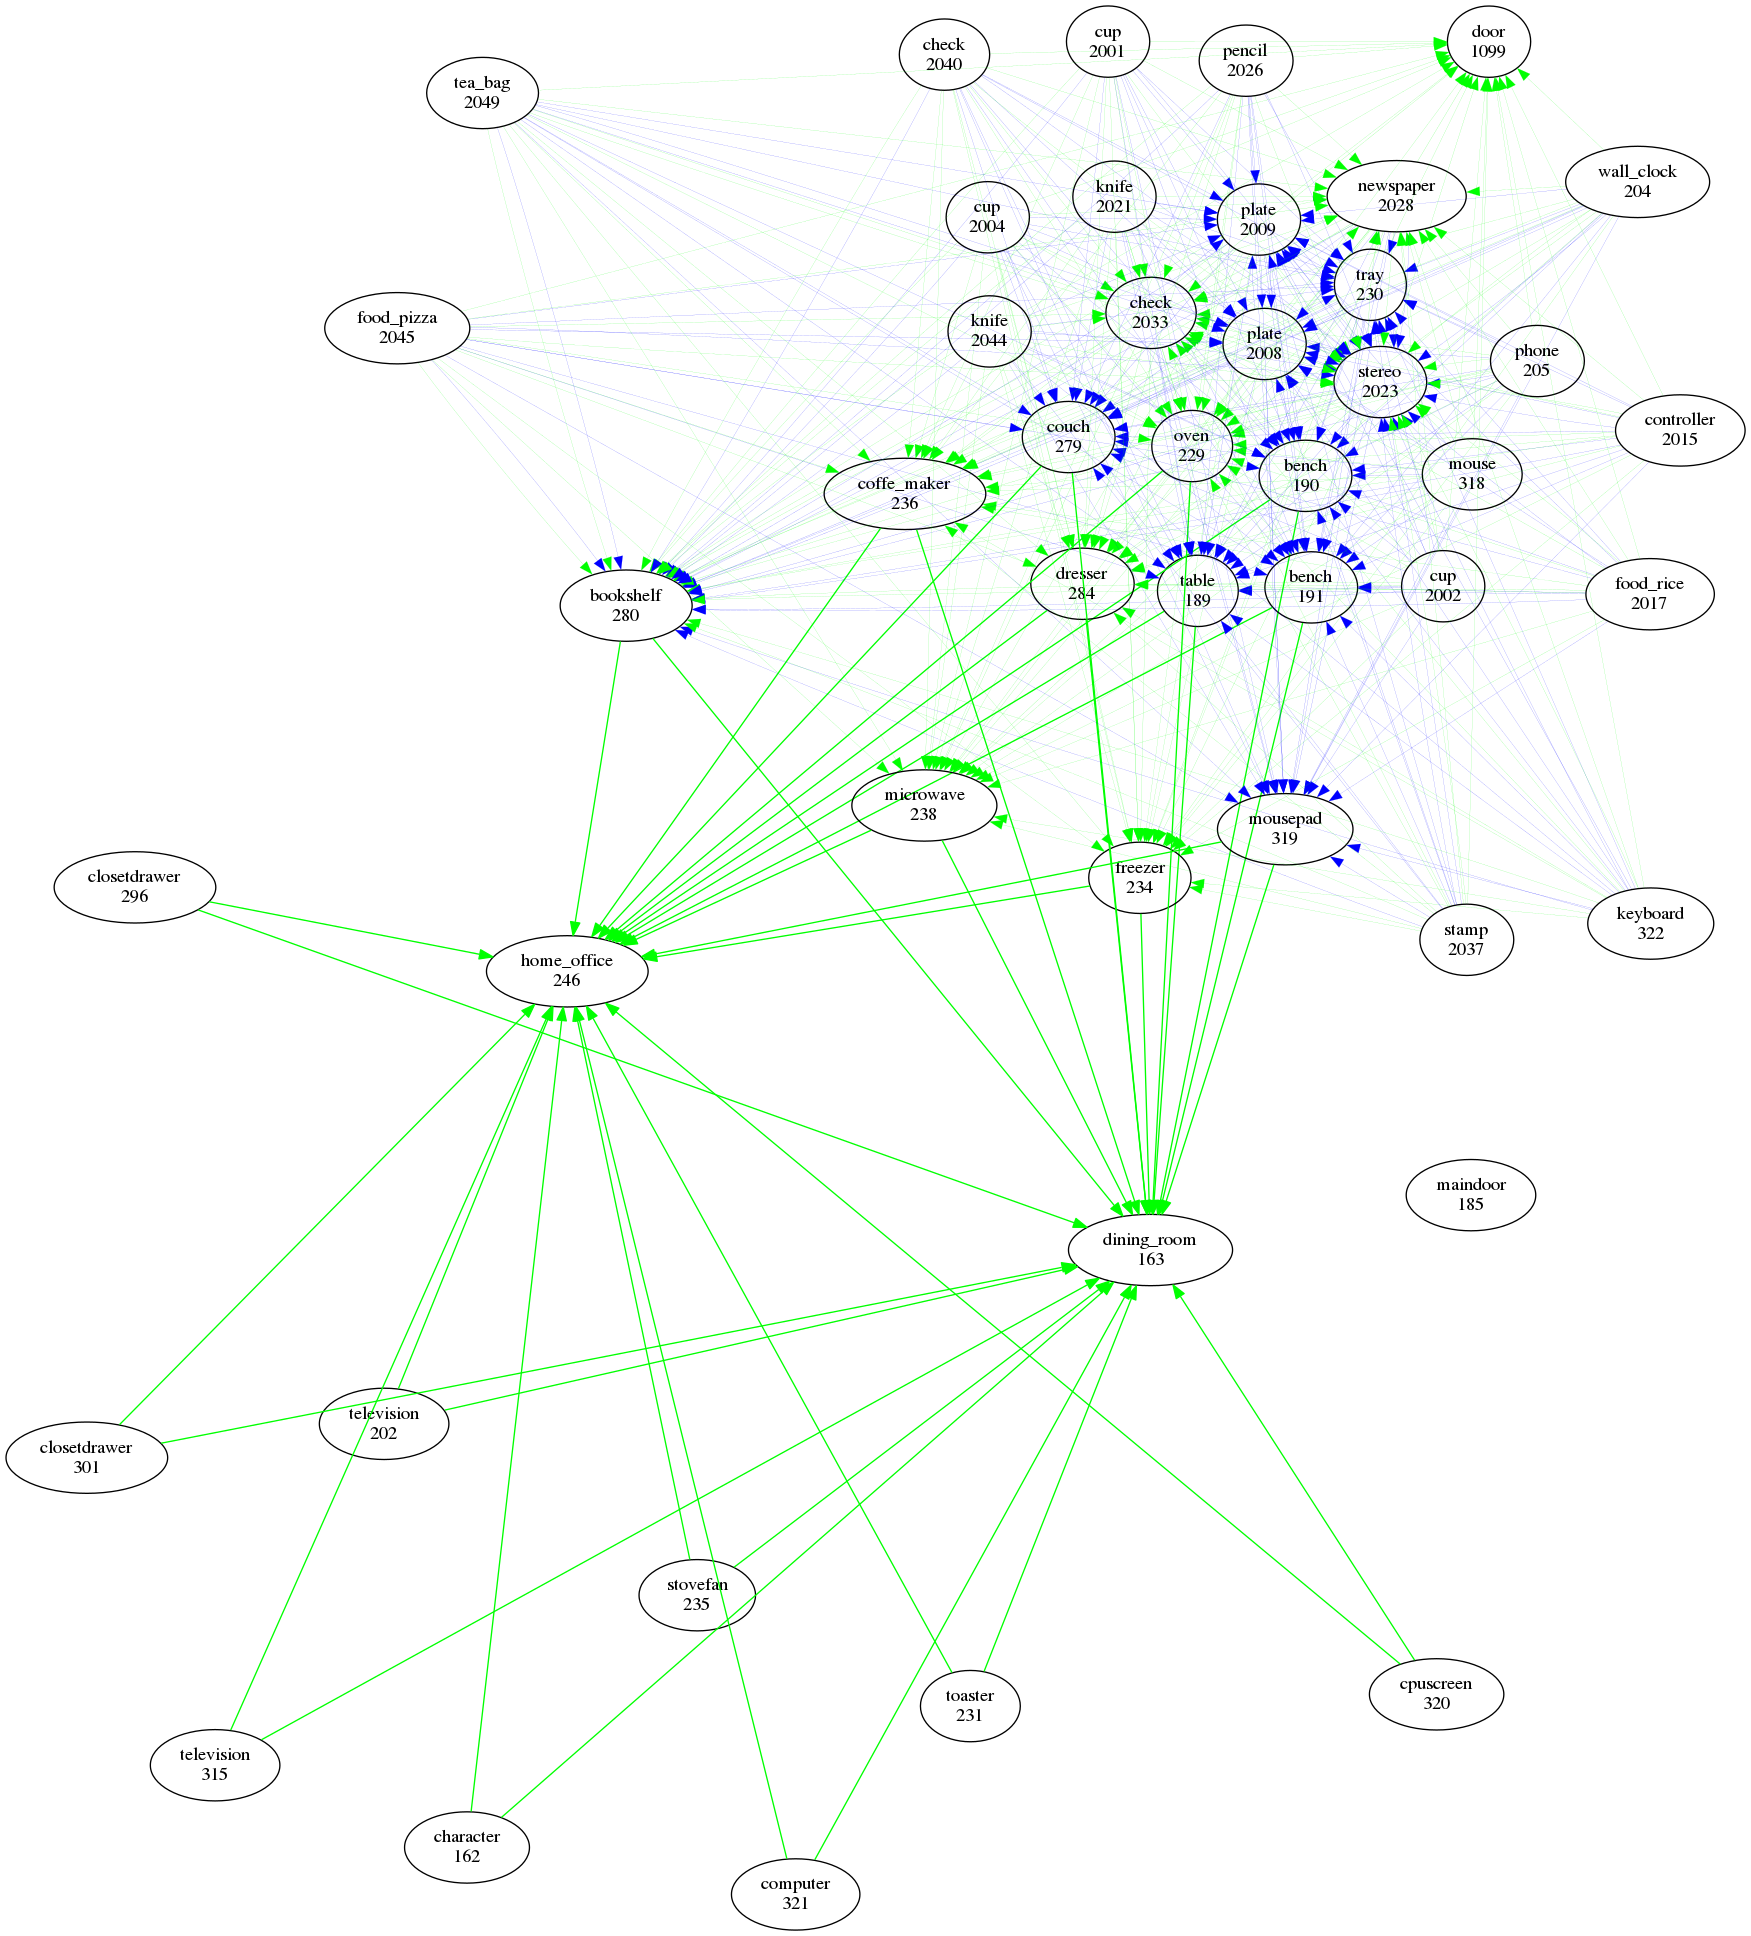

In [763]:
bel = belief.Belief(gt_state)
graph = utils_viz.belief2im(bel, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

### Visualize sampled belief

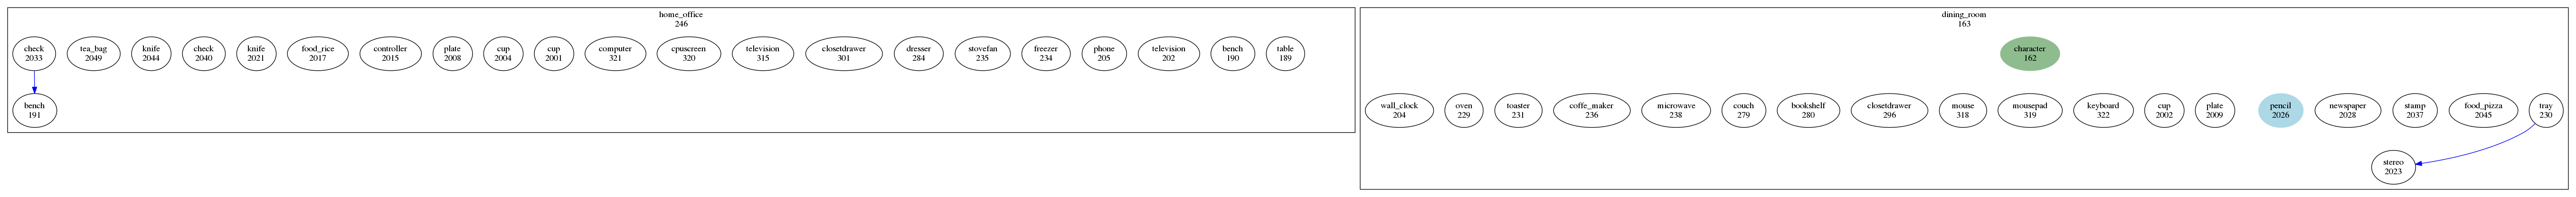

In [764]:

new_graph = bel.sample_from_belief()
graph = utils_viz.graph2im(new_graph, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

## Test belief update

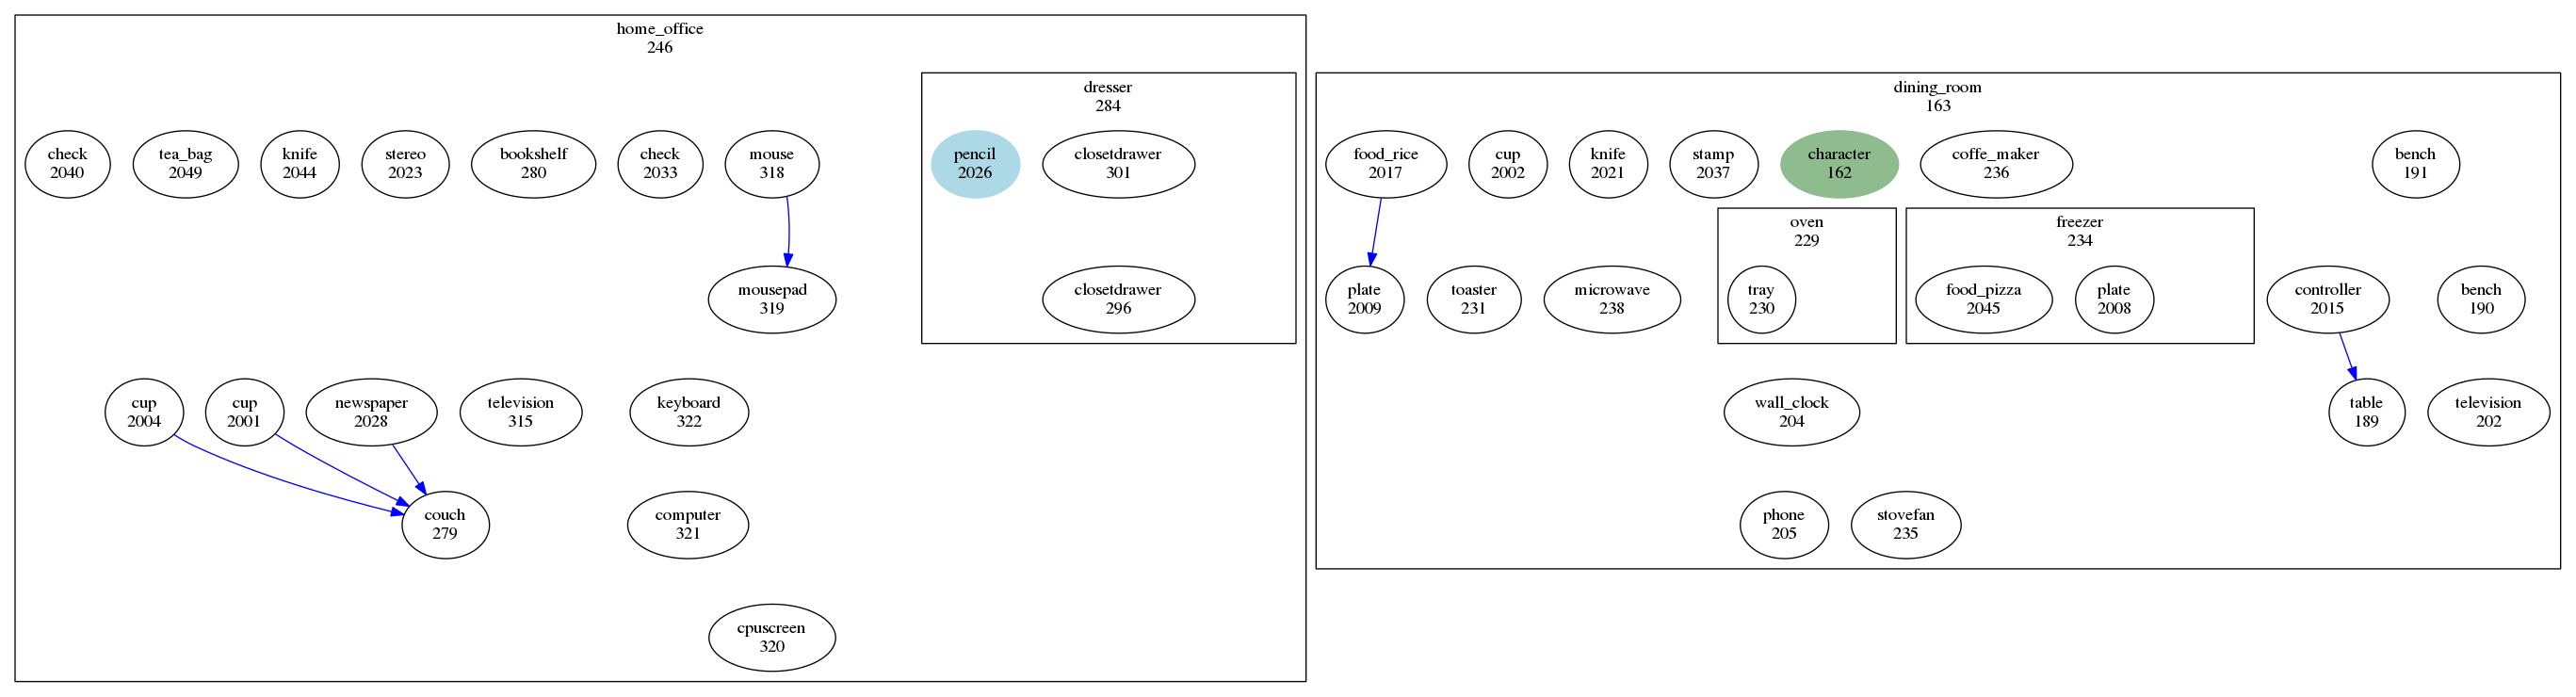

In [765]:
# Check PODMP graph
# obs_graph = curr_env.get_observations(0)
# graph = utils_viz.graph2im(obs_graph, {id_goal: 'goal', id_agent: 'agent'})
# graph.format = 'png'
# tmp = graph.view()
# display(Image(tmp))

graph = utils_viz.graph2im(gt_state, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

In [771]:
bel.update_from_gt_graph(obs_graph)

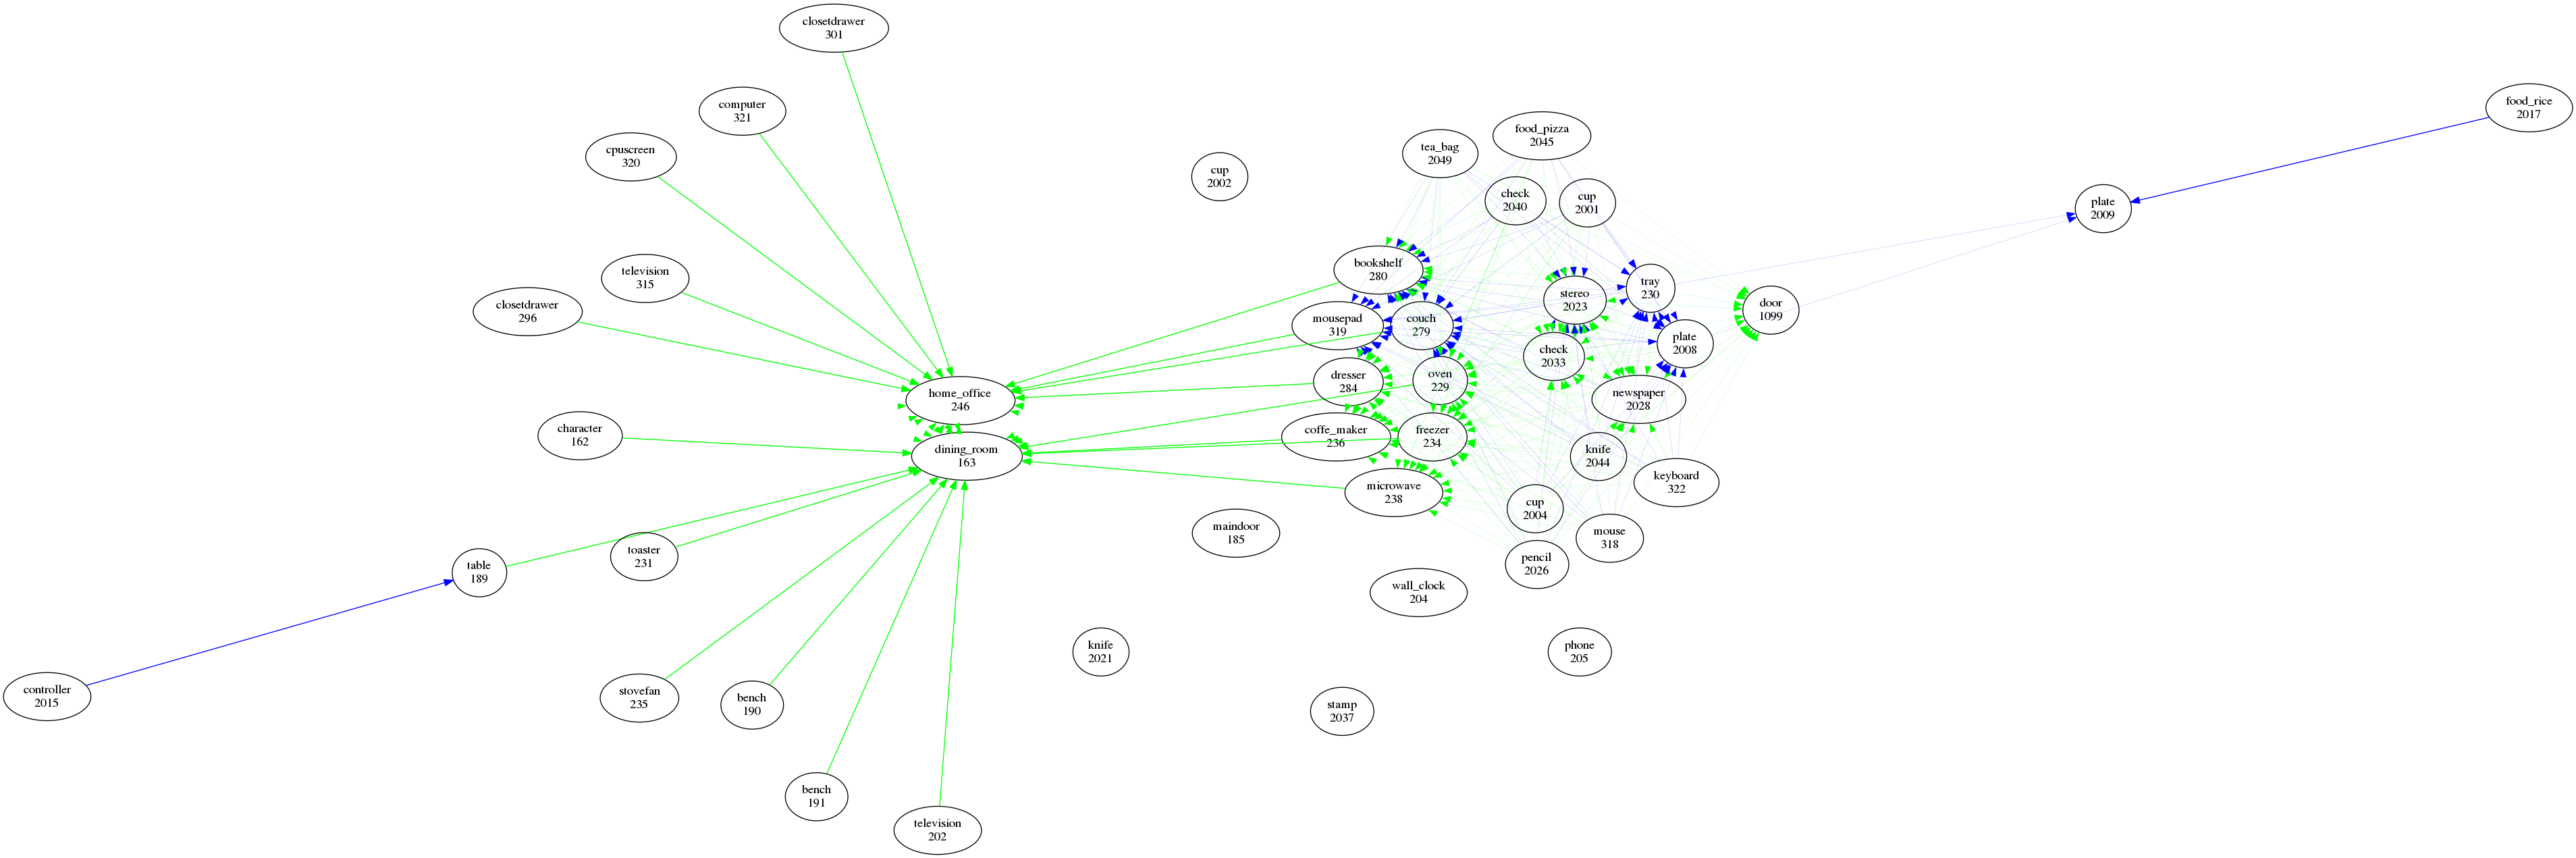

In [768]:
graph = utils_viz.belief2im(bel, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

### New sampled graph

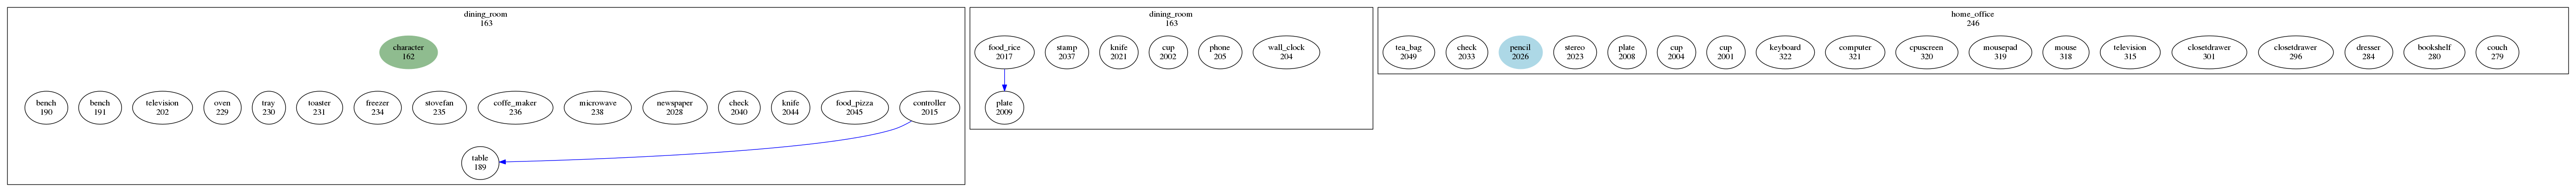

In [783]:

new_graph = bel.sample_from_belief()
graph = utils_viz.graph2im(new_graph, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

In [753]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [780]:
bel.edge_belief[2009]

{'ON': [[None, 189, 190, 191, 230, 279, 280, 319, 2008, 2023],
  array([ 1.e+00, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09,
         -1.e+09, -1.e+09, -1.e+09])],
 'INSIDE': [[None, 229, 234, 236, 238, 280, 284, 2023, 2028, 2033, 1099],
  array([ 1.e+00, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09,
         -1.e+09, -1.e+09, -1.e+09, -1.e+09])]}

In [755]:
bel.room_node[185][0]

KeyError: 185

In [732]:
%autoreload 2

In [96]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [152]:
bel.edge_belief[315]

KeyError: 315

In [248]:
bel.room_node[202]

[[163, 246], array([1., 0.])]

In [180]:
[x for x in gt_state['nodes'] if x['id'] == 315]

[{'id': 315,
  'class_name': 'television',
  'category': 'Electronics',
  'properties': ['HAS_SWITCH', 'HAS_PLUG', 'LOOKABLE'],
  'states': ['OFF'],
  'prefab_name': None,
  'bounding_box': None}]

In [185]:
[x for x in gt_state['edges'] if x['from_id'] == 202]

[{'from_id': 202, 'relation_type': 'INSIDE', 'to_id': 163}]

In [650]:
bel.edge_belief[205]

{'ON': [[None, 189, 190, 191, 230, 279, 280, 319, 2008, 2009, 2023],
  array([ 9.09090909e-02,  9.09090909e-02,  9.09090909e-02,  9.09090909e-02,
          9.09090909e-02,  9.09090909e-02,  9.09090909e-02,  9.09090909e-02,
          9.09090909e-02, -1.00000000e+09,  9.09090909e-02])],
 'INSIDE': [[None, 229, 234, 236, 238, 280, 284, 2023, 2028, 2033, 1099],
  array([ 1.e+00, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09,
         -1.e+09, -1.e+09, -1.e+09, -1.e+09])]}

In [381]:
bel.surface_ids

[None, 189, 190, 191, 230, 279, 280, 319, 2008, 2009, 2023]

In [ ]:
bel.edge_belief[]